# ASI Assessed Exercise
<i>Claudio SCALZO</i>

In [1]:
# LIBRARIES IMPORT
import numpy as np
import pandas as pd
import math as math
from time import time

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, probplot, multivariate_normal

In [2]:
# PATH AND FILES DEFINITION
mnistPath = "./datasets/MNIST/"
cifarPath = "./datasets/CIFAR10"

# FASHION MNIST
mnistTrainFile = mnistPath + "train.csv"
mnistTestFile = mnistPath + "test.csv"

# CIFAR10

# LOAD THE TRAINSET AND THE DATASET
mnistTrain = pd.read_csv(mnistTrainFile)
mnistTest = pd.read_csv(mnistTestFile)

# 1. Descriptive statistics

### 1.1 Data description

<div class='alert alert-info'>
The first step is to investigate data. It is a fundamental section, where we will learn about our data. Initially we show and plot really simple statistics: they are not really interesting but they are useful to introduce us, to understand what we are dealing with.
</div>

In [3]:
# PRINT TO DESCRIBE THE TRAIN
print("Number of rows:", mnistTrain.shape[0])
print("Attributes:", mnistTrain.drop(columns=['label']).shape[1], "(without considering the label)")
display(mnistTrain.head(10))

Number of rows: 60000
Attributes: 784 (without considering the label)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


<div class='alert alert-success'>
The number of rows is <b>60000</b>, while the number of columns is <b>785</b> (784 attributes + 1 label). But what does they mean?<br>
<br>
<list>
    <li>Each <b>row</b> represents a picture.</li>
    <li>Each <b>column</b> represents a pixel.</li>
    <li>So, the <b>value</b> of a row <i>"r"</i> in a given column <i>"c"</i> represents the brightness (from 0 to 255) of a given pixel <i>"c"</i> in a given picture <i>"r"</i>.</li>
</list>
<br>
If training on a big (where big refers to the number of pictures) dataset represent an advantage, a big dimensionality like this (784 attributes) can represent an issue for the predictive model, generally known as "curse of dimensionality" (<a href="https://en.wikipedia.org/wiki/Curse_of_dimensionality">source</a>).
</div>

In [4]:
# PRINT TO DESCRIBE THE TEST
print("Number of rows:", mnistTest.shape[0])
print("Attributes:", mnistTest.drop(columns=['label']).shape[1], "(without considering the label)")
display(mnistTest.head(10))

Number of rows: 10000
Attributes: 784 (without considering the label)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


### 1.2 Data distribution analysis

<div class='alert alert-info'>
Now is time to analyze the distribution of our data: let's do it.
</div>

In [5]:
# TAKE DISTRIBUTION
distribution = mnistTrain["label"].value_counts()

# TAKE NUMBERS AND FREQUENCIES
numbers = np.array(distribution.index)
frequencies = np.array(distribution.values)

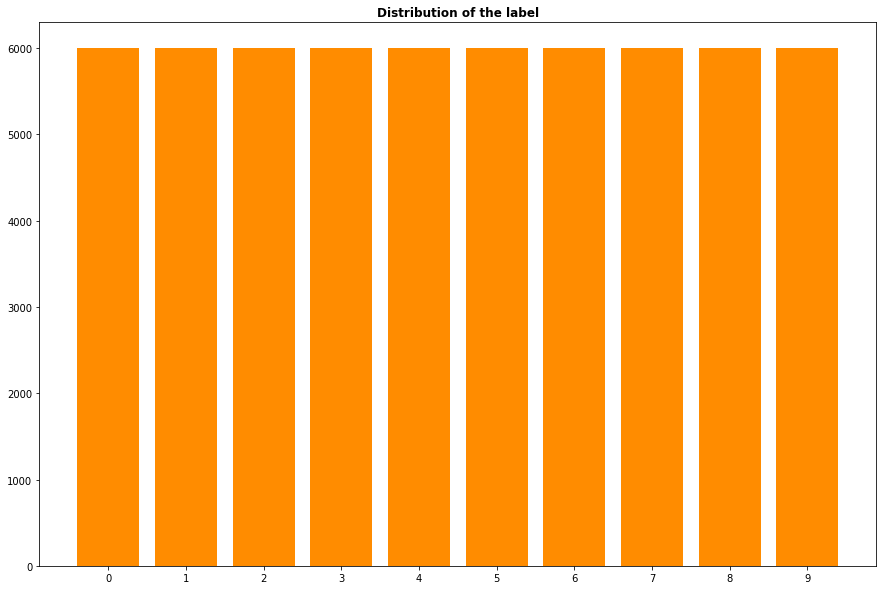

In [6]:
# PLOT THE DISTRIBUTION OF THE TARGET VARIABLE
plt.figure(figsize=(15,10))
plt.bar(numbers, frequencies, align="center", color="darkorange")
plt.xticks([i for i in range(np.min(numbers),np.max(numbers)+1)])
plt.title("Distribution of the label", weight="semibold");

<div class='alert alert-success'>
The distribution is uniform! That can be a problem for our Naive Bayes implementation, expecting a Gaussian distribution.
</div>

# 1. Naive Bayes Classifier

<div class='alert alert-info'>
Naive Bayes Classifier explanation here...
</div>

In [19]:
class NBC:
    
    # ----- PRIVATE METHODS ------------------------------------------------- #
    # MEANS AND VARIANCES FOR THE LIKELIHOOD: P(X|C)
    def _computeMeansCov(self):
        
        # Compute means and variances
        # -> For example:
        #    <means> |  attr0 | attr1 | ...    #  <vars> |  attr0 | attr1 | ...
        #    --------------------------        # --------------------------    
        #    class0  |   12   |   3   | ...    # class0  |   0.2  |  0.03 | ...
        #    class1  |   8    |   0   | ...    # class1  |  0.07  |  0.1  | ...
        #      ...   |  ...   |  ...  | ...    #   ...   |  ...   |  ...  | ...
        self.means = self.train.groupby("label").mean()
        self.cov = self.train.groupby("label").var()
    
    
    # PRIORS: P(C)
    def _computePriors(self):
        
        # Set a probability for each class: a dictionary of all P(Ci)
        # -> For example: {class0: 0.01, class1: 0.27, ...}
        self.priors = {k: v / self.nTrain for k, v in self.frequencies.items()}
    
    
    # LIKELIHOOD: P(X|C)
    def _logLikelihood(self, data, c):
        
        # Means and variances for class "c"
        meansC = np.array(self.means.loc[c])
        covC = np.array(self.means.loc[c])
        
        # Use the logarithmic pdf of the Multivariate Gaussian
        return multivariate_normal.logpdf(data, meansC, covC + 1e-3)
    # ----------------------------------------------------------------------- # 
    
    
    # ----- PUBLIC METHODS -------------------------------------------------- #
    # TRAIN - LIKELIHOOD and PRIOR
    def fit(self, train):
        
        # Trainset
        self.train = train
        self.nTrain, self.kTrain = train.shape
        
        # Compute the distribution of the label
        self.frequencies = train["label"].value_counts().to_dict()
        
        # Classes
        self.classes = list(sorted(self.frequencies.keys()))
        self.numC = len(self.classes)
        
        # Compute priors and likelihoods
        self._computePriors()
        self._computeMeansCov()
    
    
    # TEST - POSTERIOR: P(C|X)
    def predict(self, test):
        
        # Testset
        self.nTest, self.kTest = test.shape
        
        # Init posterior array
        # -> For example:
        #     <post>  |  class0 | class1 | ...
        #    -----------------------------
        #    sample0  |   0.1   |  0.4   | ...
        #    sample1  |   0.18  |  0.35  | ...
        #      ...    |   ...   |  ...   | ...
        posterior = np.zeros((self.nTest, self.numC))

        # For each class
        for c in self.classes:

            # Compute posterior for class "c"
            # -> posterior = likelihood * prior
            #    or
            # -> log(posterior) = log(likelihood) + log(prior)
            posterior[:,c] = self._logLikelihood(test, c) + np.log(self.priors[c])

        # Select the class with max probability for each sample
        predictions = np.argmax(posterior, axis=1)
        
        return predictions
    
    # VALIDATE PREDICTION
    def validate(self, pred, true):
        
        # Return the average number of different numbers
        return np.mean(pred != true)
    # ----------------------------------------------------------------------- #

In [18]:
# SPLIT IN TEST + TARGET
true = mnistTest['label']
train = mnistTrain
test = mnistTest.drop(columns=['label'])

# NAIVE BAYES CLASSIFIER
nbc = NBC()

# TRAIN
startTime = time()
nbc.fit(train)
endTime = time()
print("Train time: %.3f seconds" % (endTime-startTime))

# TEST
startTime = time()
pred = nbc.predict(test)
endTime = time()
print("Test time: %.3f seconds" % (endTime-startTime))

# ACCURACY (MSE)
error = nbc.validate(pred, true)
print("Error:", error)

Train time: 1.660 seconds
Test time: 4.080 seconds
Error: 0.3622
